# TASK 2: Prediction using Unsupervised ML

#### K-means Clustering: To predict optimum cluster for Iris Dataset using Unsupervised ML

##### Author - Nikhil Gond


In [1]:
#importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans
sns.set()

## Data Preprocessing

In [2]:
#Reading the data
data=pd.read_csv("Iris.csv")

In [3]:
#Viewing data
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#Structure of our data  
data.shape           # Data has 150 rows and 6 columns

(150, 6)

In [5]:
#Basic Statistical Details
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
#Information about Data Structure
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
# Checking for missing values
data.isnull().sum()  

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
# Correlation
data=data.drop(columns=['Id'],axis=1)
data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

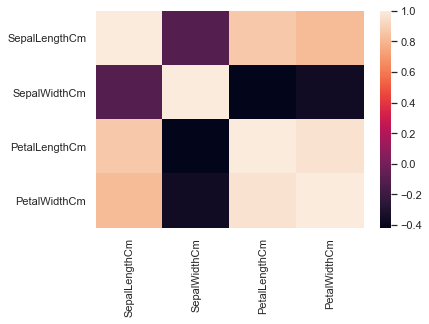

In [9]:
sns.heatmap(data.corr())

### Unique classes in our dataset

In [10]:
print(data.Species.nunique())

print(data.Species.value_counts())

3
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64


<AxesSubplot:ylabel='None'>

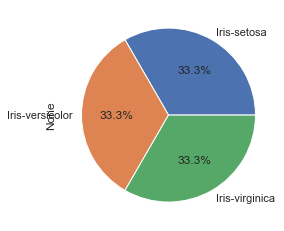

In [11]:
data.groupby('Species').size().plot.pie(autopct='%1.1f%%')

## Data Visulization

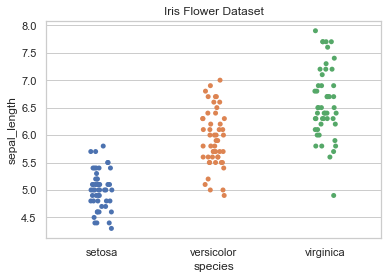

In [12]:
sns.set(style='whitegrid')
iris = sns.load_dataset('iris');
axis=sns.stripplot(x='species', y='sepal_length',data = iris);
plt.title("Iris Flower Dataset")
plt.show()

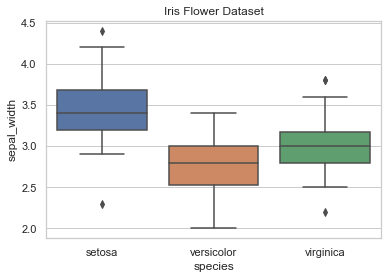

In [13]:
sns.boxplot(x='species',y='sepal_width',data = iris)
plt.title("Iris Flower Dataset")
plt.show()

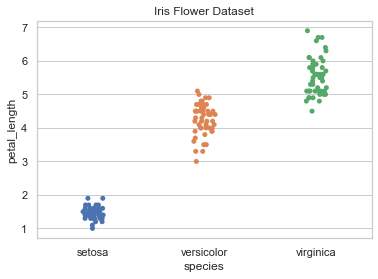

In [14]:
axis=sns.stripplot(x='species', y='petal_length',data = iris);
plt.title("Iris Flower Dataset")
plt.show()

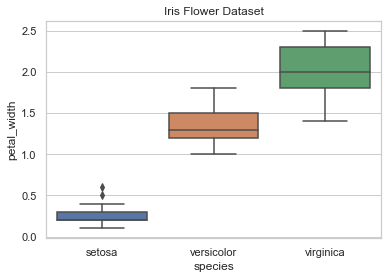

In [15]:
sns.boxplot(x='species',y='petal_width',data = iris)
plt.title("Iris Flower Dataset")
plt.show()

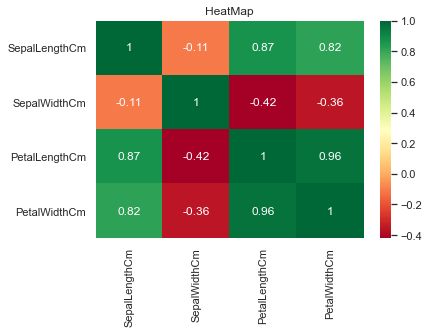

In [16]:
#heat map
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn')
plt.title("HeatMap")
plt.show()

## No.of clusters using K-means clustering

In [17]:
#finding the optimum no.of clusters suing k-means clustering

x=data.iloc[:,[0,1,2,3]].values

from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    print('k:',i,'wcss:',kmeans.inertia_)


k: 1 wcss: 680.8243999999996
k: 2 wcss: 152.36870647733915
k: 3 wcss: 78.94084142614601
k: 4 wcss: 57.34540931571815
k: 5 wcss: 46.535582051282034
k: 6 wcss: 38.93873974358975
k: 7 wcss: 34.190687924796634
k: 8 wcss: 29.90537429982511
k: 9 wcss: 27.927882157034986
k: 10 wcss: 25.955497086247092


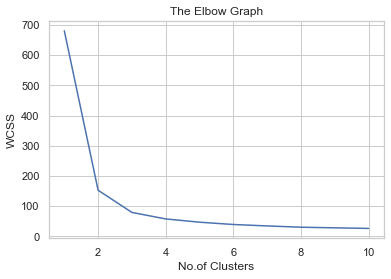

In [18]:
# Plotting The Elbow Graph

plt.plot(range(1,11),wcss)
plt.title('The Elbow Graph')
plt.xlabel('No.of Clusters')
plt.ylabel('WCSS')
plt.show()

#### Here we can see that the lowest drop of the line is at 3. So we choose 3 as the optimal number of clusters


## Fitting K-Means with Optimal number of clusters = 3

In [19]:
#fitting K-Means to data
kmeans = KMeans(n_clusters = 3, init ='k-means++', max_iter=300, n_init=10, random_state=0)

y_kmeans = kmeans.fit_predict(x)

In [20]:
#Returns a label for each dataset point based on the no.of clusters
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

## Visualizing Clusters

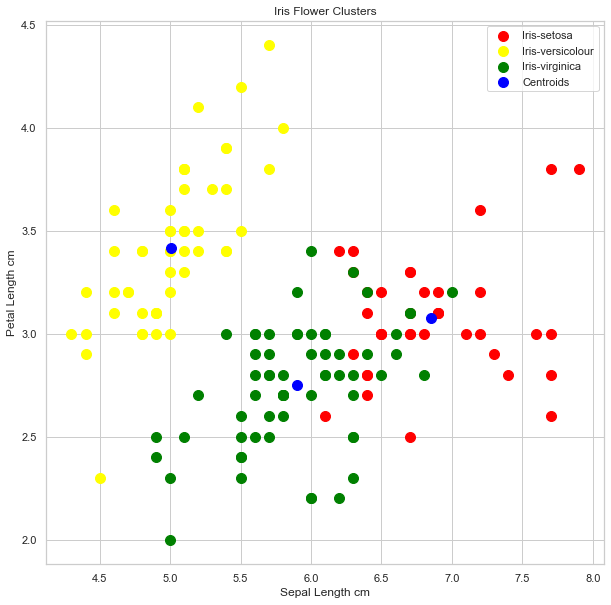

In [21]:
# Visualizing the clusters
plt.figure(figsize=(10,10))
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=100,c='red',label='Iris-setosa')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=100,c='yellow',label='Iris-versicolour')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=100,c='green',label='Iris-virginica')

#plotting centroids of clusters
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='blue',label='Centroids')
plt.title("Iris Flower Clusters")
plt.xlabel("Sepal Length cm")
plt.ylabel("Petal Length cm")
plt.legend()
plt.show()
